In [105]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [106]:
data = pd.read_csv('C:/Users/mehul/Downloads/human-resources-analytics/HR_comma_sep.csv')
data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [107]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# EDA

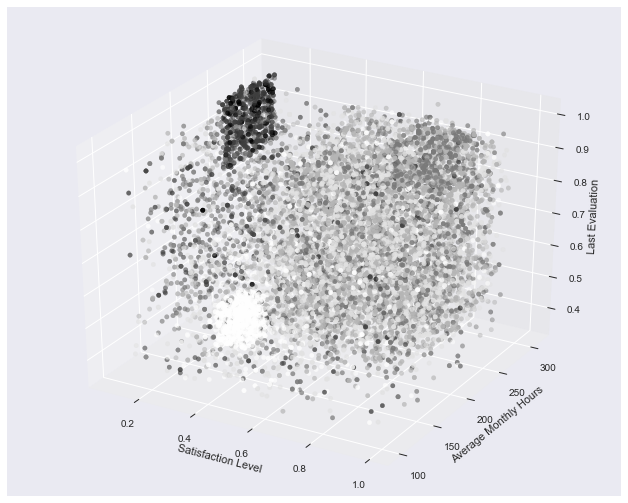

In [147]:
pd.options.mode.chained_assignment = None
fig = plt.figure(figsize=(11,9))
_ = plt.title('Multivariate Visualization with Number of Projects by Color')
ax = fig.add_subplot(111, projection='3d')
X = data['satisfaction_level']
Y = data['average_montly_hours']
Z = data['last_evaluation']
C = data['number_project']
_ = ax.scatter(xs=X, ys=Y, zs=Z, c=C)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')

plt.show()

We can identify 689 employees who fit the 'workhorse' description according to this analysis.


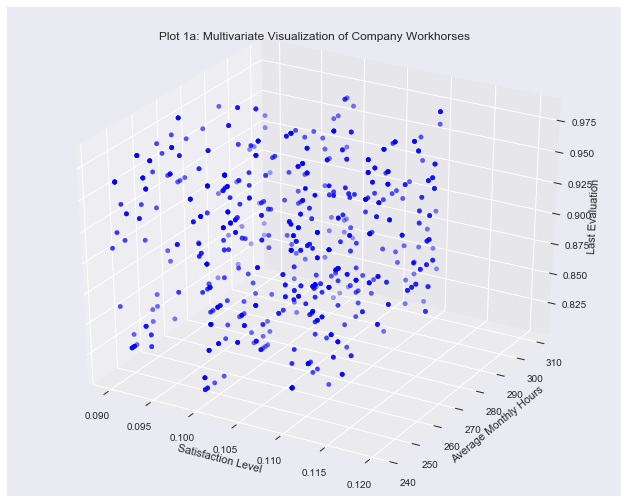

In [109]:
data['workhorses'] = 0
data['workhorses'][(data['number_project'] >= 6) & (data['average_montly_hours'] > 200) & (data['satisfaction_level'] < 0.130) 
        & (data['last_evaluation'] > 0.8)] = 1
print("We can identify {} employees who fit the 'workhorse' description according to this analysis."
      .format(len(data[data['workhorses'] == 1])))

workhorsedf = data[data['workhorses'] == 1]

fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111, projection='3d')
x = workhorsedf['satisfaction_level']
y = workhorsedf['average_montly_hours']
z = workhorsedf['last_evaluation']
_ = ax.scatter(xs=x, ys=y, zs=z, c='blue')
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Plot 1a: Multivariate Visualization of Company Workhorses')
plt.show()

We can identify 582 employees who fit the 'disengaged' description according to this analysis.


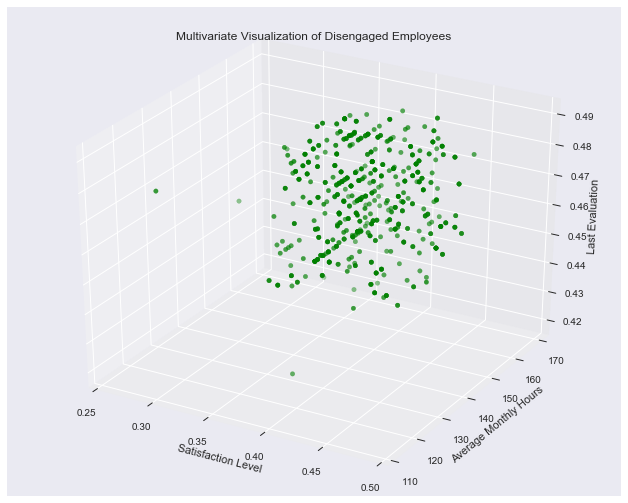

In [110]:
data['disengaged'] = 0
data['disengaged'][(data['number_project'] <= 2) & (data['average_montly_hours'] <= 170) & (data['average_montly_hours'] > 110) & (data['satisfaction_level'] < 0.50) & (data['satisfaction_level'] > 0.20) & (data['last_evaluation'] < 0.50) & (data['last_evaluation'] > 0.41)] = 1
print("We can identify {} employees who fit the 'disengaged' description according to this analysis.".format(len(data[data['disengaged'] == 1])))

disengageddf = data[data['disengaged'] == 1]

fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111, projection='3d')
X = disengageddf['satisfaction_level']
Y = disengageddf['average_montly_hours']
Z = disengageddf['last_evaluation']
_ = ax.scatter(xs=X, ys=Y, zs=Z, c='green')
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Multivariate Visualization of Disengaged Employees')
plt.show()

It is clear from the graph that there are 3 distinct clusters. THe darkest cluster are employees who have: 1)long working hours 2)high satisfaction level 3)high number of projects 4) high evaluation by their peers. We call these as workhorses of the company. The white blob is composed of employees that have low working hours, low satisffaction level, low evaluation and low number of projects. We term theese as disengaged employees who are not being utilized to their maximum capacity. The third medium colored grouping is termed as veterans who are employees having high satisfaction level, moderate number of projects, high working hours and high evaluation. We generate these 3 new features according to the observations in the graph, and each of the groups are plotted separately to glean more information about their individual behaviours.

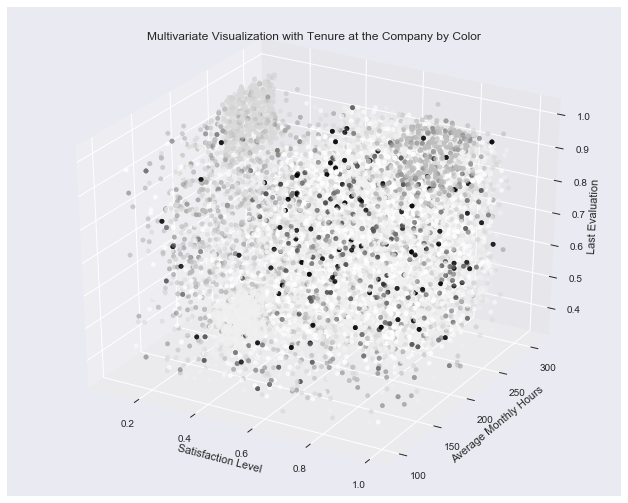

In [111]:
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111, projection='3d')
Y = data['average_montly_hours']
X = data['satisfaction_level']
Z = data['last_evaluation']
C = data['time_spend_company']
_ = ax.scatter(xs=X, ys=Y, zs=Z, c=C)
_ = plt.title('Multivariate Visualization with Tenure at the Company by Color')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_zlabel('Last Evaluation')

plt.show()

It is interesting to note h=from the above graph that there exists a relationship between the tenure of the employees and our clusters. Specifically, disengaged employees are junior than the workhorses and the veterans are the seniormost of the lot. The major problem in allocation of projects seems to be the lack of trust in handing over responsibilities to the new employees hence resulting in them being disengaged from the company.

We can identify 1801 employees who fit the 'veteran' description according to our analysis till now.


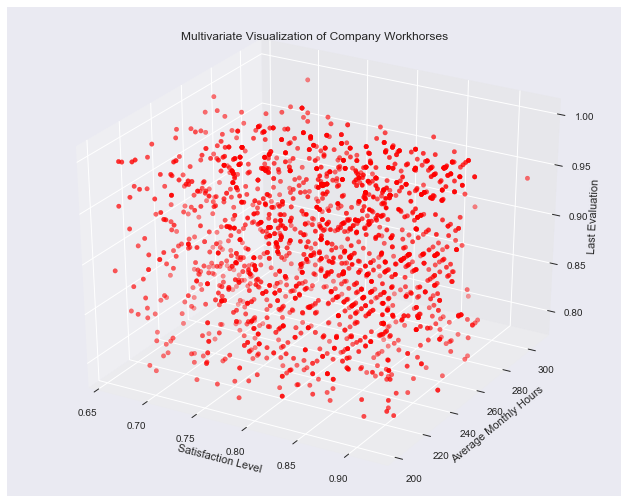

In [112]:
data['veterans'] = 0
data['veterans'][(data['number_project'] >= 3) & (data['average_montly_hours'] > 200) & (data['satisfaction_level'] > 0.65) & (data['satisfaction_level'] < .93) & (data['last_evaluation'] > 0.78)] = 1
print("We can identify {} employees who fit the 'veteran' description according to our analysis till now.".format(len(data[data['veterans'] == 1])))

veteransdf = data[data['veterans'] == 1]

fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111, projection='3d')
Y = veteransdf['average_montly_hours']
Z = veteransdf['last_evaluation']
X = veteransdf['satisfaction_level']
_ = ax.scatter(xs=X, ys=Y, zs=Z, c='red')
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Multivariate Visualization of Company Workhorses')
plt.show()

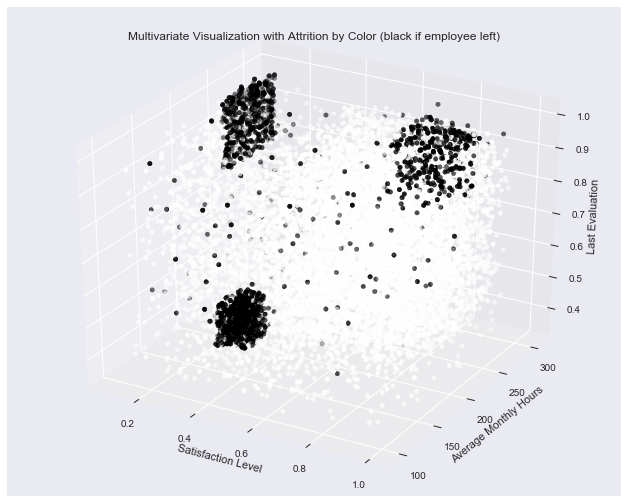

In [113]:
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111, projection='3d')
Z = data['last_evaluation']
X = data['satisfaction_level']
Y = data['average_montly_hours']
C = data['left']
_ = ax.scatter(xs=X, ys=Y, zs=Z, c=C)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Multivariate Visualization with Attrition by Color (black if employee left)')
plt.show()

It is shocking to see that all employee attrition is taking place from our already identified groups of employees. Based on this we formulate the following explanation for employees leaving:
Workhorses leave because they are burnt out from the high working hours and number of projects.
Disengaged people leave because they are not satisfied with their job responsibilities.
Veterans may either retire our shift to a job with better prospects.

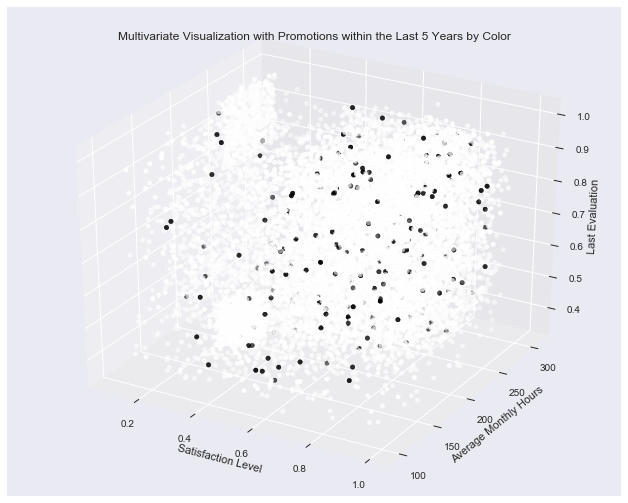

In [114]:
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111, projection='3d')
_ = plt.title('Multivariate Visualization with Promotions within the Last 5 Years by Color')
x = data['satisfaction_level']
z = data['last_evaluation']
y = data['average_montly_hours']
c = data['promotion_last_5years']
_ = ax.scatter(xs=x, ys=y, zs=z, c=c)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
plt.show()

The distribution of promotions within the firm seems entirely random which indicates low level of internal promotions. This may mean that company is hiring from outside.

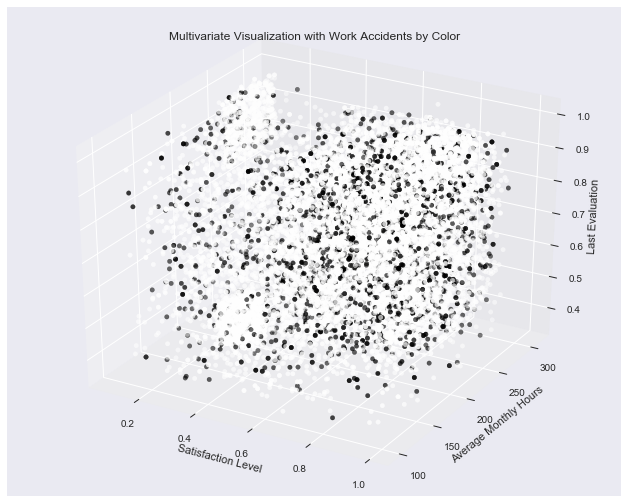

In [115]:
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111, projection='3d')
p = data['satisfaction_level']
q = data['average_montly_hours']
r = data['last_evaluation']
s = data['Work_accident']
_ = plt.title('Multivariate Visualization with Work Accidents by Color')
_ = ax.scatter(xs=p, ys=q, zs=r, c=s)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
plt.show()

No pattern observable here.

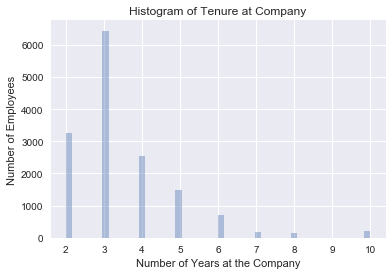

In [116]:
_ = sns.distplot(data['time_spend_company'],kde=False)
_ = plt.title('Histogram of Tenure at Company')
_ = plt.xlabel('Number of Years at the Company')
_ = plt.ylabel('Number of Employees')
plt.show()

The histogram shows that the employees in the firm are not staying more than 10 years at best. This throws into question the retirement of the veterans, who rather leave in hopes of better compensation elsewhere. The low mode of only 3 years shows that the company rarely prmotes from within.


In [117]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'workhorses', 'disengaged',
       'veterans'],
      dtype='object')

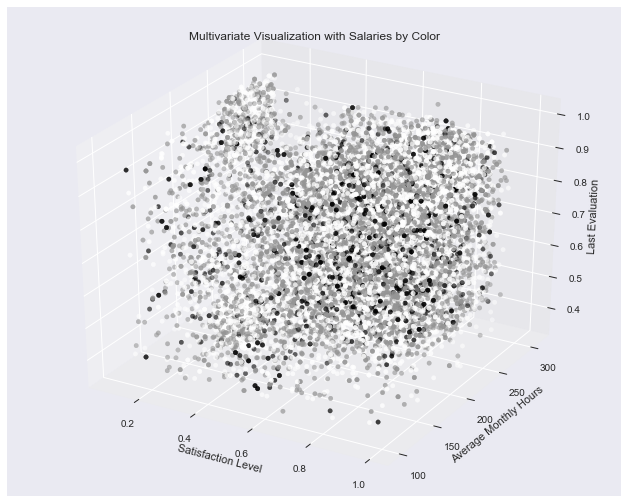

In [118]:
data['salaries'] = 1
data['salaries'][data['salary'] == 'medium'] = 2
data['salaries'][data['salary'] == 'high'] = 3

fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111, projection='3d')
q = data['average_montly_hours']
r = data['last_evaluation']
s = data['salaries']
p = data['satisfaction_level']
_ = plt.title('Multivariate Visualization with Salaries by Color')
_ = ax.scatter(xs=p, ys=q, zs=r, c=s)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')

plt.show()

As compared to previous visualizations, there is no clear distribution of the salaries instead they appear to be randomly scattered. This is troubling as we would expect the workhorses and veterans to be adequately compensated for their contributions. Or at least the disengaged employees should show a clear lower than average salary.


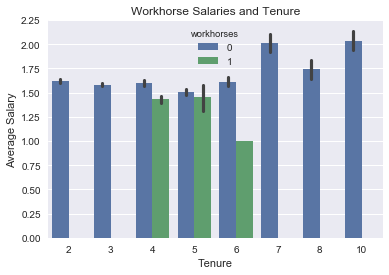

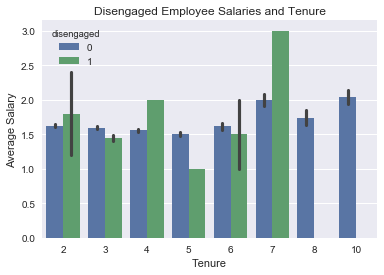

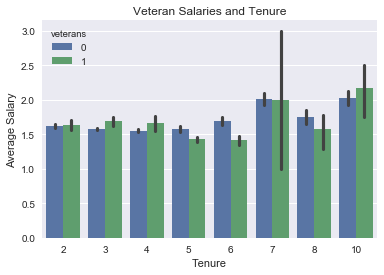

In [119]:
_ = sns.barplot(x='time_spend_company', y='salaries', data=data, hue='workhorses')
_ = plt.title('Workhorse Salaries and Tenure')
_ = plt.xlabel('Tenure')
_ = plt.ylabel('Average Salary')
plt.show()

_ = sns.barplot(x='time_spend_company', y='salaries', data=data, hue='disengaged')
_ = plt.title('Disengaged Employee Salaries and Tenure')
_ = plt.xlabel('Tenure')
_ = plt.ylabel('Average Salary') 
plt.show()

_ = sns.barplot(x='time_spend_company', y='salaries', data=data, hue='veterans')
_ = plt.title('Veteran Salaries and Tenure')
_ = plt.xlabel('Tenure')
_ = plt.ylabel('Average Salary')
plt.show()

It is clear from the above graphs that there is no definite relationship between the compensation awarded and the performance of the employees. The workhorses are not compensated for their high work hours seeing as they arre consistently paid below the average salary whereas disengaged employees are overcompensated. The veterans seem to be paid fairly well in comparison to the company average. To investigate this relation further, we analyse in specific, the sales department where logic dictates, performance should be rewarded.

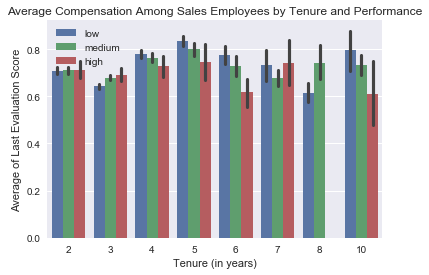

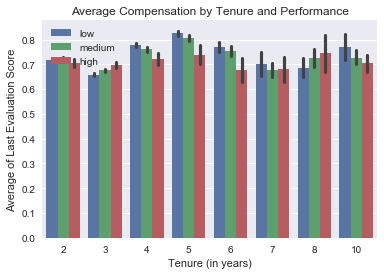

The correlation between evaluation and employee salaries is [[ 1.         -0.01300152]
 [-0.01300152  1.        ]].


In [120]:
sales = data[data['sales'] == 'sales']
_ = sns.barplot(x='time_spend_company', y='last_evaluation', hue='salary', hue_order=['low', 'medium', 'high'], data=sales)
_ = plt.xlabel('Tenure (in years)')
_ = plt.ylabel('Average of Last Evaluation Score')
_ = plt.title('Average Compensation Among Sales Employees by Tenure and Performance')
_ = plt.legend(loc=2)
plt.show()

_ = sns.barplot(x='time_spend_company', y='last_evaluation', hue='salary', hue_order=['low', 'medium', 'high'], data=data)
_ = plt.xlabel('Tenure (in years)')
_ = plt.ylabel('Average of Last Evaluation Score')
_ = plt.title('Average Compensation by Tenure and Performance')
_ = plt.legend(loc=2)
plt.show()


correl = np.corrcoef(x=data['last_evaluation'], y=data['salaries'])
print('The correlation between evaluation and employee salaries is {}.'.format(correl))

So for both the average employee of the company and for the sales department in particular it appears that compensation is not tied to performance. In fact there is a tiny negative correlation between the two (although it is so small it is basically irrelevant). We can effectively say that there is no correlation at all between the two. We further investigate whether this problem is localized to a specific department of the company or as a whole.

In [121]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'workhorses', 'disengaged',
       'veterans', 'salaries'],
      dtype='object')

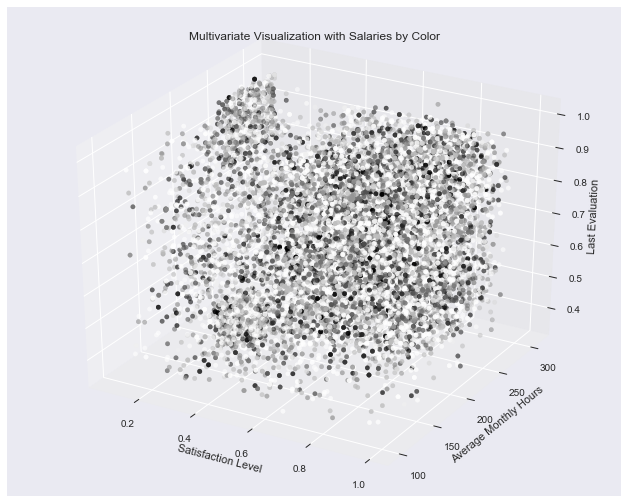

In [122]:
data=data.rename(columns = {'sales':'department'})
data['dep'] = 1
data['dep'][data['department'] == 'accounting'] = 2
data['dep'][data['department'] == 'hr'] = 3
data['dep'][data['department'] == 'technical'] = 4
data['dep'][data['department'] == 'support'] = 5
data['dep'][data['department'] == 'management'] = 6
data['dep'][data['department'] == 'IT'] = 7
data['dep'][data['department'] == 'product_mng'] = 8
data['dep'][data['department'] == 'RandD'] = 9


fig = plt.figure(figsize=(11,9))
XA = fig.add_subplot(111, projection='3d')
_ = plt.title('Multivariate Visualization with Salaries by Color')
X = data['satisfaction_level']
Y = data['average_montly_hours']
Z = data['last_evaluation']
C = data['dep']
_ = XA.scatter(xs=X, ys=Y, zs=Z, c=C)
_ = XA.set_xlabel('Satisfaction Level')
_ = XA.set_zlabel('Last Evaluation')
_ = XA.set_ylabel('Average Monthly Hours')

plt.show()

It looks suspiciously like the department to which an employee is assigned basically has nothing to do with the other issues we've identified so far. This is unexpected.

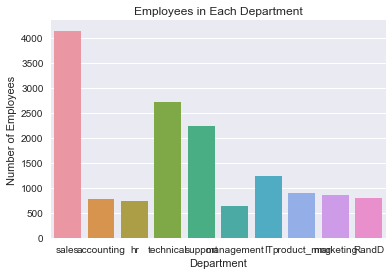

In [123]:
_ = sns.countplot(x='department', data=data)
_ = plt.xlabel('Department')
_ = plt.ylabel('Number of Employees')
_ = plt.title('Employees in Each Department')
plt.show()

# Feature Engineering

We've already created features to capture workhorses, disengaged employees, veterans, and seniors. We've also manually created a couple (salaries and dep) to provide a numeric equivalent to some categorical features.

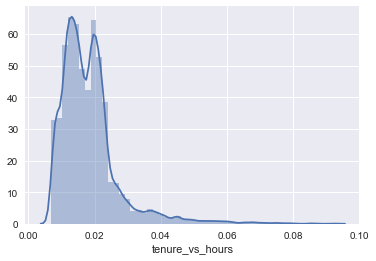

[[ 1.          0.06110538]
 [ 0.06110538  1.        ]] [[ 1.         -0.09587533]
 [-0.09587533  1.        ]]


In [124]:
data['tenure_vs_hours'] = data['time_spend_company'] / data['average_montly_hours']
_ = sns.distplot(data['tenure_vs_hours'])
plt.show()

x = np.corrcoef(x=data['tenure_vs_hours'], y=data['left'])
y = np.corrcoef(x=data['tenure_vs_hours'], y=data['satisfaction_level'])
print(x, y)

This first feature captures the number of hours worked relative to an employees tenure at the company. It has a very small positive correlation to an employee leaving and a somewhat higher negative correlation to employee satisfaction. We'll see when it comes time to start looking at feature importances whether this is really important. We generate a few more additional features below.

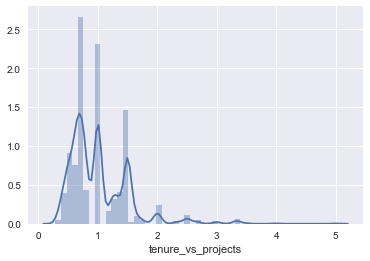

[[ 1.          0.18169542]
 [ 0.18169542  1.        ]] [[ 1.         -0.07690095]
 [-0.07690095  1.        ]]


In [125]:
data['tenure_vs_projects'] = data['time_spend_company'] / data['number_project']
_ = sns.distplot(data['tenure_vs_projects'])
plt.show()
x = np.corrcoef(x=data['tenure_vs_projects'], y=data['left'])
y = np.corrcoef(x=data['tenure_vs_projects'], y=data['satisfaction_level'])
print(x, y)

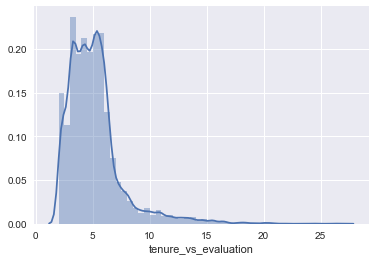

[[ 1.          0.08822866]
 [ 0.08822866  1.        ]] [[ 1.         -0.14480719]
 [-0.14480719  1.        ]]


In [126]:
def make_feature(df, new_feat, feat1, feat2, feat3, feat4):
    df[new_feat] = df[feat1] / df[feat2]
    _ = sns.distplot(df[new_feat])
    plt.show()
    x = np.corrcoef(x=df[new_feat], y=df[feat3])
    y = np.corrcoef(x=df[new_feat], y=df[feat4])
    print(x,y)
    return df[new_feat]

data['tenure_vs_evaluation'] = make_feat(data, 'tenure_vs_evaluation', 'time_spend_company', 'last_evaluation', 'left', 'satisfaction_level')


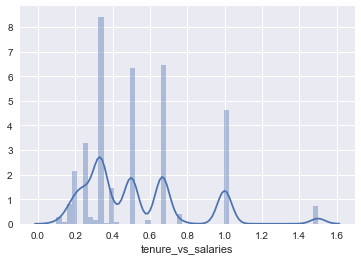

[[ 1.         -0.25943467]
 [-0.25943467  1.        ]] [[ 1.          0.14704879]
 [ 0.14704879  1.        ]]


In [127]:
data['tenure_vs_salaries'] = make_feature(data, 'tenure_vs_salaries', 'salaries', 'time_spend_company', 'left', 'satisfaction_level')


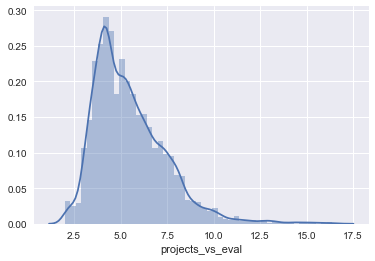

[[ 1.         -0.08840702]
 [-0.08840702  1.        ]] [[ 1.         -0.14328961]
 [-0.14328961  1.        ]]


In [128]:
data['projects_vs_eval'] = make_feature(data, 'projects_vs_eval', 'number_project', 'last_evaluation', 'left', 'satisfaction_level')


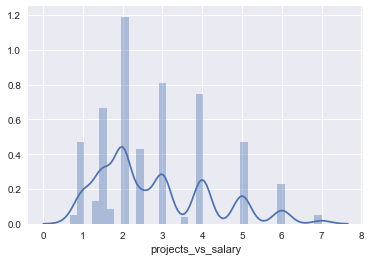

[[ 1.          0.12061998]
 [ 0.12061998  1.        ]] [[ 1.         -0.12871092]
 [-0.12871092  1.        ]]


In [129]:
data['projects_vs_salary'] = make_feature(data, 'projects_vs_salary', 'number_project', 'salaries', 'left', 'satisfaction_level')
  

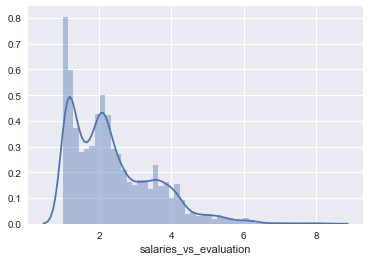

[[ 1.         -0.11209986]
 [-0.11209986  1.        ]] [[ 1.         -0.02360494]
 [-0.02360494  1.        ]]


In [130]:
data['salaries_vs_evaluation'] = make_feature(data, 'salaries_vs_evaluation', 'salaries', 'last_evaluation', 'left', 'satisfaction_level')


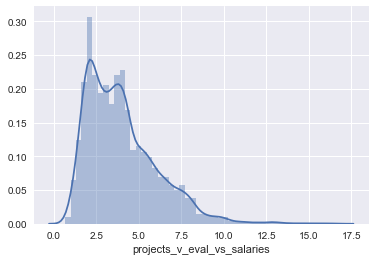

[[ 1.          0.03805773]
 [ 0.03805773  1.        ]] [[ 1.         -0.13314758]
 [-0.13314758  1.        ]]


In [131]:
data['projects_v_eval_vs_salaries'] = make_feature(data, 'projects_v_eval_vs_salaries', 'projects_vs_eval', 'salaries', 'left', 'satisfaction_level')


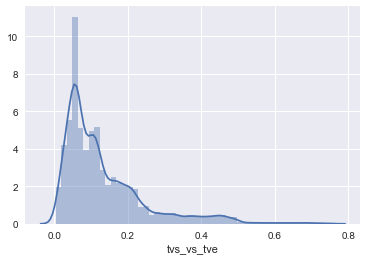

[[ 1.         -0.29280758]
 [-0.29280758  1.        ]] [[ 1.         0.2004401]
 [ 0.2004401  1.       ]]


In [132]:
data['tvs_vs_tve'] = make_feature(data, 'tvs_vs_tve', 'tenure_vs_salaries', 'tenure_vs_evaluation', 'left', 'satisfaction_level')


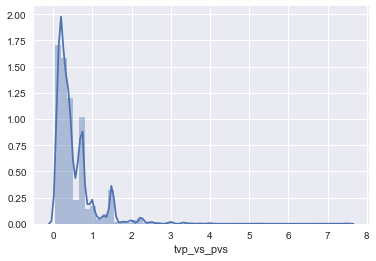

[[ 1.          0.10729223]
 [ 0.10729223  1.        ]] [[ 1.         -0.06736069]
 [-0.06736069  1.        ]]


In [133]:
data['tvp_vs_pvs'] = make_feature(data, 'tvp_vs_pvs', 'tenure_vs_projects', 'projects_vs_salary', 'left', 'satisfaction_level')


In [134]:
del data['department']
del data['salary']
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'workhorses', 'disengaged', 'veterans',
       'salaries', 'dep', 'tenure_vs_hours', 'tenure_vs_projects',
       'tenure_vs_evaluation', 'tenure_vs_salaries', 'projects_vs_eval',
       'projects_vs_salary', 'salaries_vs_evaluation',
       'projects_v_eval_vs_salaries', 'tvs_vs_tve', 'tvp_vs_pvs'],
      dtype='object')

# Principle Component Analysis

First We'll get everything scaled so the models can learn from it more easily, then We'll do some PCA. We'll split our train and test sets out prior to the unsupervised learning so that we can finish the analysis once the machine learning work is complete.

In [135]:
from sklearn import preprocessing

x = data
scaler = preprocessing.scale(x)
cols = x.columns
data1 = pd.DataFrame(scaler, columns=cols, index=data.index)
data1['left'] = data['left']



In [136]:
from sklearn.decomposition import PCA
X = data
Y = X['left']
del X['left']

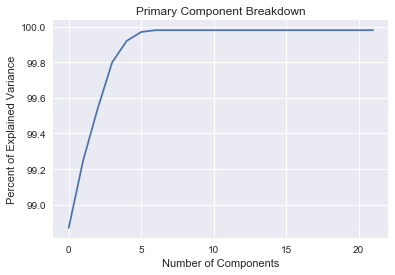

[ 98.87  99.25  99.54  99.8   99.92  99.97  99.98  99.98  99.98  99.98
  99.98  99.98  99.98  99.98  99.98  99.98  99.98  99.98  99.98  99.98
  99.98  99.98]


In [137]:
pca = PCA(n_components=22)
X = pca.fit_transform(X)
var = pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
_ = plt.plot(var1,)
_ = plt.xlabel('Number of Components')
_ = plt.ylabel('Percent of Explained Variance')
_ = plt.title('Primary Component Breakdown')
plt.show()
print(var1)

From the graph it is clear that almost all the variance in the data is explained by 8 features. The PCA helps to identify the signal from the background noise which would increase the accuracy of our model substantially. The feature reduction can be explained through high co-relation among the newly generated features.

We'll take the first eight components on this list and proceed with our learning algorithms. There is apparently no additional information to be gleaned from the remaining sixteen, as you can see from both the plot and the explained variance ratios above.

In [138]:
pca = PCA(n_components=8)
X = pca.fit_transform(X)
print(X.shape)

(14999, 8)


# Modelling 

In [146]:
def score_outcomes(df_test, out_array):
    """Summarize the true/F_Ps/negatives identified by my model"""
    
    Com = pd.DataFrame(index=df_test.index)
    Com['test'] = df_test
    Com['prediction'] = out_array

    # Compute total and percentage of T_Ps

    Com['T_P'] = 0
    Com['T_P'][(Com['test'] == 1) & (Com['prediction'] == 1)] = 1
    truepospercent = np.round(np.sum(Com['T_P']) / len(Com.index) * 100, decimals=2)
    truepostotal = np.sum(Com['T_P'])

    # Compute total and percentage of T_Ns

    Com['T_N'] = 0
    Com['T_N'][(Com['test'] == 0) & (Com['prediction'] == 0)] = 1
    truenegpercent = np.round(np.sum(Com['T_N']) / len(Com.index) * 100, decimals=2)
    truenegtotal = np.sum(Com['T_N'])

    # Compute total and percentage of T_Ns

    Com['F_P'] = 0
    Com['F_P'][(Com['test'] == 0) & (Com['prediction'] == 1)] = 1
    falsepospercent = np.round(np.sum(Com['F_P']) / len(Com.index) * 100, decimals=2)
    falsepostotal = np.sum(Com['F_P'])

    # Compute total and percentage of F_Ns

    Com['F_N'] = 0
    Com['F_N'][(Com['test'] == 1) & (Com['prediction'] == 0)] = 1
    falsenegpercent = np.round(np.sum(Com['F_N']) / len(Com.index) * 100, decimals=2)
    falsenegtotal = np.sum(Com['F_N'])

    print('There are {}, or {}%, T_Ps.'.format(truepostotal, truepospercent))
    print('There are {}, or {}%, T_Ns.'.format(truenegtotal, truenegpercent))
    print("Congratulations! You have correctly identified {}, or {}%, of the observed outcomes.".format(truepostotal + truenegtotal, truepospercent + truenegpercent))
    print('There are {}, or {}%, F_Ps.'.format(falsepostotal, falsepospercent))
    print('There are {}, or {}%, F_Ns.'.format(falsenegtotal, falsenegpercent))
    print("Bummer! You incorrectly identified {}, or {}%, of the observed outcomes.".format(falsenegtotal + falsepostotal, falsepospercent + falsenegpercent))

# Random Forest

In [145]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

my_forest = RandomForestClassifier(n_estimators=100, random_state=42)
my_forest.fit(X_train, y_train)
forest = my_forest.predict(X_test)
print(score_outcomes(y_test, forest))

There are 1126, or 22.75%, true positives.
There are 3745, or 75.66%, T_Ns.
Congratulations! You have correctly identified 4871, or 98.41%, of the observed outcomes.
There are 24, or 0.48%, false positives.
There are 55, or 1.11%, false negatives.
Bummer! You incorrectly identified 79, or 1.59%, of the observed outcomes.
None


# Gradient Boosting Classifier

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

gradboost = GradientBoostingClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
prediction = gradboost.predict(X_test)
print(score_outcomes(y_test, prediction))

There are 1063, or 21.47%, true positives.
There are 3707, or 74.89%, true negatives.
Congratulations! You have correctly identified 4770, or 96.36%, of the observed outcomes.
There are 62, or 1.25%, false positives.
There are 118, or 2.38%, false negatives.
Bummer! You incorrectly identified 180, or 3.63%, of the observed outcomes.
None


# Support Vector Classifier

In [142]:
from sklearn.svm import SVC

gm = SVC(random_state=42).fit(X_train, y_train)
prediction = gm.predict(X_test)
print(score_outcomes(y_test, prediction))

There are 1065, or 21.52%, true positives.
There are 3687, or 74.48%, true negatives.
Congratulations! You have correctly identified 4752, or 96.0%, of the observed outcomes.
There are 82, or 1.66%, false positives.
There are 116, or 2.34%, false negatives.
Bummer! You incorrectly identified 198, or 4.0%, of the observed outcomes.
None


Deciding which model to actually use is based on the level of return on investment in employee retention and also on the accuracy of the predictions. Our model with the best ROI (the Gradient Boosting Classifier at 2.84%) performs the best from a bean counter point of view, but the Random Forest model retains 45 more employees at only a fraction less.

We could also create a new model of only the high paid employees as it would be expensive to replace these executives rather than lower experience employees eho are easily replaced. This would further reduce the target population for employee retention.

Overall, we make the argument that a sensible targeted investment in retaining the employees would yield good dividends to the company. We also suggest reevaluating the compensation policies to reflect employee performance as well as award promotions to deserving employees.